# Week1
diabetes Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ 1d-CNNÏùÑ Ï†ÅÏö©ÌïòÏó¨ classificationÍ≥º RegressionÏùÑ ÏßÑÌñâÌïúÎã§.

Ïù¥Îïå, timeseries dataÏóê CNNÏùÑ Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ sequence_splitÌï®ÏàòÍ∞Ä ÏÑ†ÌñâÎêòÏñ¥Ïïº ÌïúÎã§.

## Data Preprocessing

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_csv('../dataset/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [154]:
df.shape

(768, 9)

In [156]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [158]:
'''
    Pregnancies: ÏûÑÏã† ÌöüÏàò
    Glucose: Ìè¨ÎèÑÎãπ ÏàòÏπò
    BloodPressure: ÌòàÏïï
    SkinThickness: ÌîºÎ∂Ä ÎëêÍªò
    Insulin: Ïù∏ÏäêÎ¶∞ ÏàòÏπò
    BMI: Ï≤¥ÏßàÎüâÏßÄÏàò (BMI)
    DiabetesPedigreeFunction: ÎãπÎá® Ïú†Ï†ÑÏ†Å Í≥ÑÎ≥¥ Ìï®Ïàò
    Age: ÎÇòÏù¥
    Outcome: Í≤∞Í≥º (ÎãπÎá®Î≥ë Ïó¨Î∂Ä)
'''

'\n    Pregnancies: ÏûÑÏã† ÌöüÏàò\n    Glucose: Ìè¨ÎèÑÎãπ ÏàòÏπò\n    BloodPressure: ÌòàÏïï\n    SkinThickness: ÌîºÎ∂Ä ÎëêÍªò\n    Insulin: Ïù∏ÏäêÎ¶∞ ÏàòÏπò\n    BMI: Ï≤¥ÏßàÎüâÏßÄÏàò (BMI)\n    DiabetesPedigreeFunction: ÎãπÎá® Ïú†Ï†ÑÏ†Å Í≥ÑÎ≥¥ Ìï®Ïàò\n    Age: ÎÇòÏù¥\n    Outcome: Í≤∞Í≥º (ÎãπÎá®Î≥ë Ïó¨Î∂Ä)\n'

In [160]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C:\Users\user\AppData\Local\Temp\ipykernel_2928\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


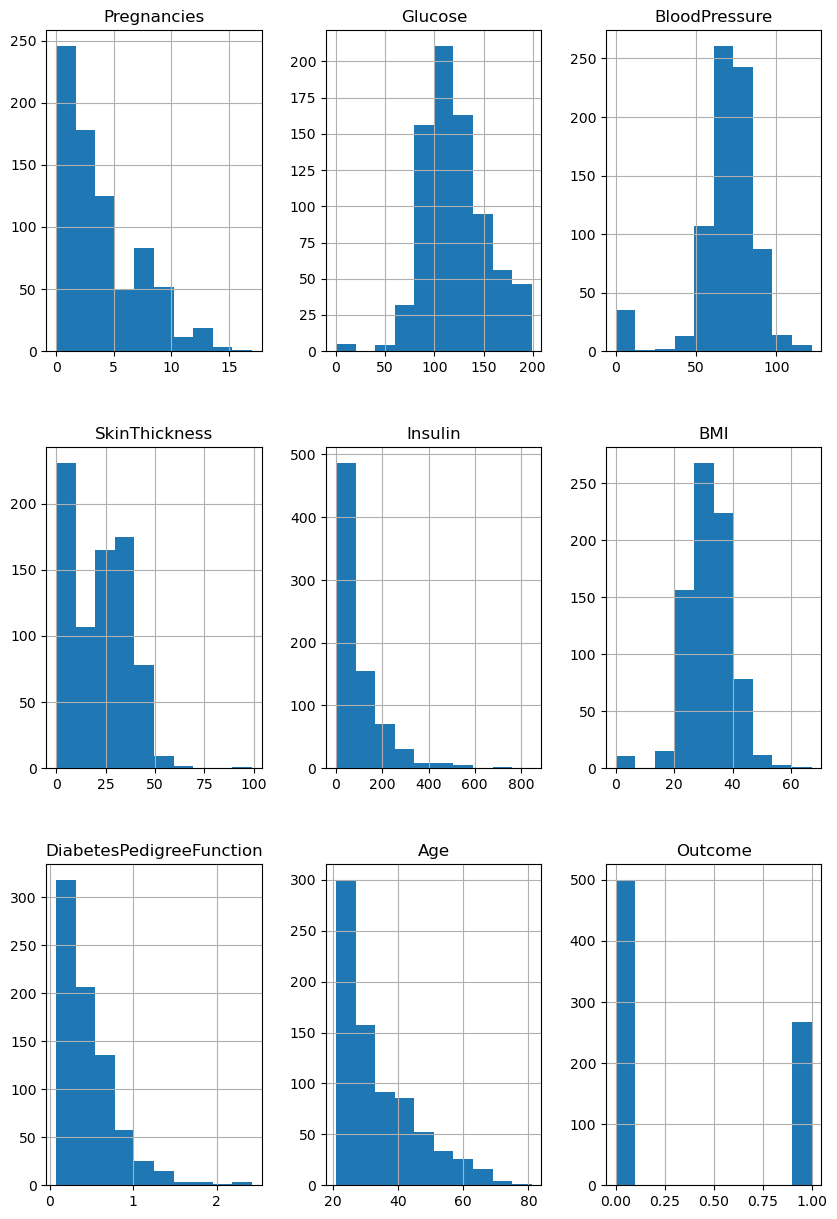

In [162]:
# ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [163]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

Text(0.5, 1.0, 'Outcome')

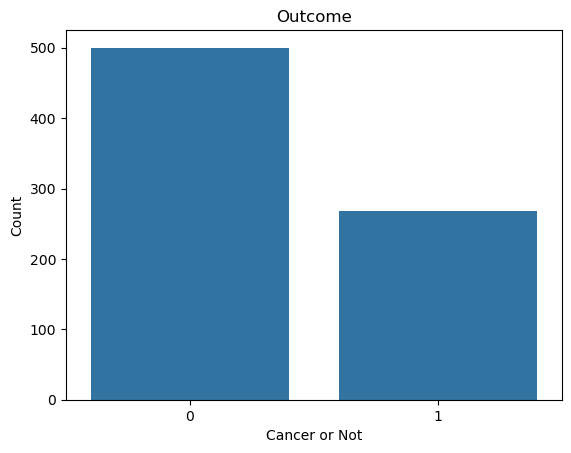

In [166]:
# Î†àÏù¥Î∏î Í∞úÏàò ÌôïÏù∏ (Í∑∏ÎûòÌîÑ)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [168]:
# Outcome Í∞úÏàò ÌôïÏù∏ (Ïà´Ïûê)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [170]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [174]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Sequence Split
classÏùò ÏµúÎπàÍ∞íÏùÑ yÎ°ú ÌïòÎäî Sequential dataÎ•º Î∞òÌôòÌïòÎèÑÎ°ù ÌïòÏûê.

ÎèÑÎ©îÏù∏ ÏßÄÏãùÏù¥ ÌïÑÏöîÌïòÎã§. ÎãπÎá®Î≥ëÏùÑ ÏûòÎ™ª ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÄ ÏπòÎ™ÖÏ†ÅÏù∏Í∞Ä?
ÏπòÎ™ÖÏ†ÅÏùº Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. Í∑∏Îü¨ÎØÄÎ°ú ÏµúÎπàÍ∞íÏù¥ ÏïÑÎãå Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÍ∞Ä 1Ïù¥Î©¥ 1Ïù¥ ÎêòÎèÑÎ°ù ÏàòÏ†ïÌïòÍ≤†Îã§.

In [177]:
from scipy.stats import mode
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        
        seq_x = sequences[i:end_ix, :-1]
        
        # Ï∂úÎ†• yÎäî ÎßàÏßÄÎßâ Ïó¥ÏóêÏÑú Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÍ∞Ä 1Ïù¥Î©¥ 1
        if np.any(sequences[i:end_ix, -1] == 1):
            seq_y = 1
        else:
            seq_y = 0
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

split_sequence Ìï®ÏàòÎ•º ÌÜµÌï¥ ÏïûÏùò 5Î™Ö Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ Îã§Ïùå Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÎãπÎá® Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎèÑÎ°ù Íµ¨ÏÑ±Ìï¥Î≥¥Ïûê.  
ÏÇ¨Ïã§ ÎãπÎá® Îç∞Ïù¥ÌÑ∞Îäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÎùº ÏàúÌôò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎìúÎäî Í≤å Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùÑ Í≤É Í∞ôÎã§. ÌïòÏßÄÎßå ÌïôÏäµ Î™©Ï†ÅÏúºÎ°ú ÏßÑÌñâÌï¥Î≥¥Ïûê.  

In [180]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [182]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(572, 5, 8) (572,)
(188, 5, 8) (188,)


In [185]:
# One-Hot Encode
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

## Classification
### Design model

In [188]:
# classifier
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout

n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

classifier = keras.Sequential()
classifier.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
classifier.add(Conv1D(64, kernel_size=5, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(32, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

classifier.add(Conv1D(8, kernel_size=3, activation='tanh', padding='same'))
classifier.add(MaxPooling1D(2, padding='same'))

# output layer
classifier.add(Flatten())
classifier.add(Dense(2, activation='sigmoid'))

In [190]:
# optimizer, lossfunction
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [192]:
# keras.utils.plot_model(model)
classifier.summary()

Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_8 (Conv1D)                    ‚îÇ (None, 5, 64)               ‚îÇ           2,624 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_8 (MaxPooling1D)       ‚îÇ (None, 3, 64)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_9 (Conv1D)                    ‚îÇ (None, 3, 32)               ‚îÇ           6,176 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_9 (MaxPooling1D)       ‚îÇ (None, 2, 32)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_10 (Conv1D)                   ‚îÇ (None, 2, 8)                ‚îÇ             776 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_10 (MaxPooling1D)      ‚îÇ (None, 1, 8)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_3 (Flatten)                  ‚îÇ (None, 8)                   ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                      ‚îÇ (None, 2)                   ‚îÇ              18 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 9,594 (37.48 KB)

 Trainable params: 9,594 (37.48 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = classifier.fit(X_train, y_train_onehot, validation_split=0.1, 
                    epochs=30, callbacks=[early_stopping_cb])

Epoch 1/30
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 36ms/step - accuracy: 0.5791 - loss: 0.6650 - val_accuracy: 1.0000 - val_loss: 0.2540
Epoch 2/30
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.8457 - loss: 0.4182 - val_accuracy: 1.0000 - val_loss: 0.1631
Epoch 3/30
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 0.8729 - loss: 0.3516 - val_accuracy: 1.0000 - val_loss: 0.1356
Epoch 4/30
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.8539 - loss: 0.3514 - val_accuracy: 1.0000 - val_loss: 0.1500
Epoch 5/30
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.8982 - loss: 0.3005 - val_accuracy: 0.9828 - val_loss: 0.1694


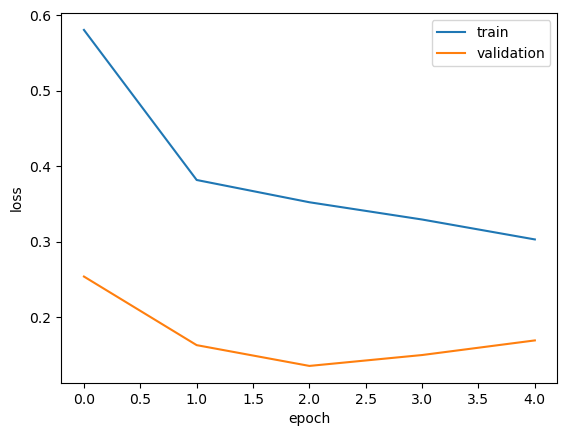

In [195]:
# ÏÜêÏã§ Í≥°ÏÑ†
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [196]:
early_stopping_cb.stopped_epoch

4

In [197]:
classifier.evaluate(X_test, y_test_onehot)

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.8782 - loss: 0.3469 


[0.3086039423942566, 0.9042553305625916]

Î¨∏Ï†úÏÉÅÌô©  
ÎãπÎá®Î≥ëÏùÑ Í≤ÄÏ∂úÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨ ÌïòÎÇòÎùºÎèÑ 1Ïù¥Î©¥ 1Î°ú ÏòàÏ∏°ÌïòÍ≤å ÌñàÎã§. Í∑∏Îû¨ÎçîÎãà ÎåÄÎ∂ÄÎ∂ÑÏù¥ ÏòàÏ∏°Ïù¥ ÎßûÏïÑ Ï†ïÌôïÎèÑÍ∞Ä Îß§Ïö∞ ÎÜíÏïÑÏ°åÎã§. Ïù¥Î†áÍ≤å Î™®Îç∏ÏùÑ ÏÑ§Í≥ÑÌïòÎäî Í≤ÉÏù¥ ÎßûÏùÑÏßÄ ÏùòÎ¨∏Ïù¥Îã§. Îçî Í≥µÎ∂ÄÌï¥ Î≥¥ÎèÑÎ°ù ÌïòÏûê.

In [199]:
y_pred = classifier.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step


In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.90      1.00      0.95       169

    accuracy                           0.90       188
   macro avg       0.95      0.53      0.52       188
weighted avg       0.91      0.90      0.86       188

[[  1  18]
 [  0 169]]


In [207]:
model_file = '../diabetes_cnn_clf.keras'
keras.models.save_model(classifier, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ../diabetes_cnn_clf.keras


## Regression
### Structure model

In [210]:
X = df.drop(['BMI', 'Outcome'], axis=1)
y = df['BMI']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [214]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [216]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [218]:
# Split sequence Ïû¨Ï†ïÏùò
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        # ÏûÖÎ†• ÏãúÌÄÄÏä§Îäî ÎßàÏßÄÎßâ Ïó¥ÏùÑ Ï†úÏô∏Ìïú Í∞í
        seq_x = sequences[i:end_ix, :-1]
        # Ï∂úÎ†• yÎäî ÎßàÏßÄÎßâ Ïó¥Ïùò ÌèâÍ∑†Í∞í
        seq_y = np.mean(sequences[i:end_ix, -1])
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [220]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(610, 5, 7) (610,)
(150, 5, 7) (150,)


In [222]:
# One-Hot Encode
# y_train_onehot = pd.get_dummies(y_train).values
# y_test_onehot = pd.get_dummies(y_test).values

ü§î RegressionÏóêÏÑú one-hot encodingÌïòÎäî Ïù¥Ïú†Î•º Ïûò Î™®Î•¥Í≤†Îã§.

In [225]:
# regressor
n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

regressor = keras.Sequential()
regressor.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
regressor.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

regressor.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

# output layer
regressor.add(Flatten())
regressor.add(Dense(1))

In [227]:
# optimizer, lossfunction
regressor.compile(loss='mse', metrics=['mse'])

In [229]:
# keras.utils.plot_model(model)
regressor.summary()

Model: "sequential_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d_11 (Conv1D)                   ‚îÇ (None, 5, 64)               ‚îÇ           2,304 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_11 (MaxPooling1D)      ‚îÇ (None, 3, 64)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)                  ‚îÇ (None, 3, 64)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_12 (Conv1D)                   ‚îÇ (None, 3, 32)               ‚îÇ           6,176 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_12 (MaxPooling1D)      ‚îÇ (None, 2, 32)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)                  ‚îÇ (None, 2, 32)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_4 (Flatten)                  ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ              65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = regressor.fit(X_train, y_train, validation_split=0.1, batch_size=32,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 37ms/step - loss: 926.5014 - mse: 926.5014 - val_loss: 616.9401 - val_mse: 616.9401
Epoch 2/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 525.7055 - mse: 525.7055 - val_loss: 251.3472 - val_mse: 251.3472
Epoch 3/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 188.0933 - mse: 188.0933 - val_loss: 59.5077 - val_mse: 59.5077
Epoch 4/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 47.9221 - mse: 47.9221 - val_loss: 37.3191 - val_mse: 37.3191
Epoch 5/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 37.1250 - mse: 37.1250 - val_loss: 32.3305 - val_mse: 32.3305
Epoch 6/100
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 33.4006 - mse: 33.4006 - val_loss: 28.5385 - val_mse: 28.5385
Epoch 7/100
18/18 ‚îÅ‚î

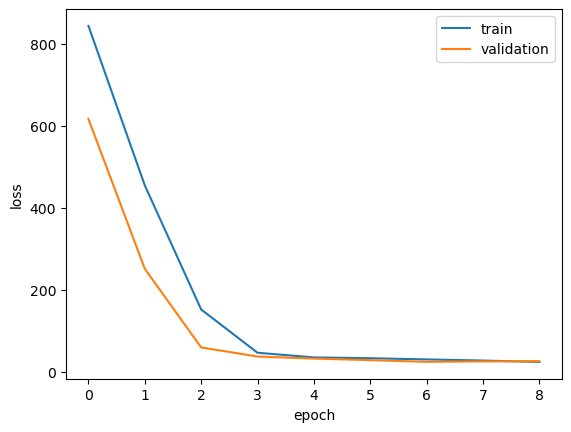

In [232]:
# ÏÜêÏã§ Í≥°ÏÑ†
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [233]:
early_stopping_cb.stopped_epoch

8

In [234]:
regressor.evaluate(X_test, y_test)

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 23.9497 - mse: 23.9497 


[20.757436752319336, 20.757436752319336]

In [235]:
model_file = '../diabetes_cnn_rg.keras'
keras.models.save_model(regressor, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ../diabetes_cnn_rg.keras


Ïó¨Í∏∞ÏÑú ÌïúÍ∞ÄÏßÄ ÏùòÎ¨∏  
scikit-learnÏù¥ Ï†úÍ≥µÌïòÎäî train_test_splitÏùÄ shuffleÏù¥ ÏûêÎèôÎ∞òÏòÅÎêúÎã§Í≥† ÌñàÎäîÎç∞, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî falseÎ°ú ÏßÄÏ†ïÌï¥Ï§òÏïº ÌïòÎäîÍ≤å ÏïÑÎãåÍ∞Ä?
ÏßÄÍ∏àÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÏßÄÎßå Ï∂îÌõÑ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑ† shuffle=falseÎ°ú ÏßÄÏ†ïÌïòÏó¨ splitÌïòÎèÑÎ°ù ÌïúÎã§.